In [380]:
#import 
import pandas
import numpy
import scipy
import matplotlib.pyplot as plt
import scipy.stats
import seaborn
import math

In [381]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [382]:
#Open the data file 
new = pandas.read_csv("Data_Set.csv")

In [383]:
#seperate data frame for offense only 
data_defence = new[new["Position"]=='Defence']
##print the number of defence 
print('Number of defenceman:',len(data_defence))
##check forst 20 lines of data
#data_defence[:20]

Number of defenceman: 230


In [384]:
#seperate data frame for defence only 
data_offense = new[new["Position"]=='Offense']
##print the number of offense
print('Number of Offense:',len(data_offense))
##check what dataframe looks like 
#data_offense[:20]

Number of Offense: 437


Plus-minus data looks to be normally distributed. 
greater number of minuses for defense, and greater number of pluses for offense. 

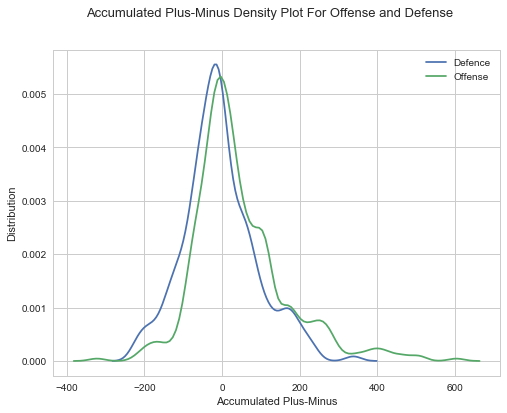

In [385]:
#Overlayed Kernal Density Plot of Offense and Defence 
plt.subplots(figsize=(8, 6))
##Defence 
fig = seaborn.kdeplot(numpy.array(data_defence['PM']), bw=20, label = "Defence")
##Offense 
fig  = seaborn.kdeplot(numpy.array(data_offense['PM']), bw=20, label = "Offense")
plt.legend(); # Create a legend 
fig.figure.suptitle("Accumulated Plus-Minus Density Plot For Offense and Defense", fontsize = 13)
plt.xlabel("Accumulated Plus-Minus")
plt.ylabel("Distribution")
plt.show()

In [386]:
#Fit simple linear regression model 
mod = smf.ols('PM ~ Salary + Position', data=new).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     PM   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     291.8
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           1.16e-91
Time:                        12:29:25   Log-Likelihood:                -3899.5
No. Observations:                 667   AIC:                             7805.
Df Residuals:                     664   BIC:                             7819.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -93.7971    

/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  
/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  import sys


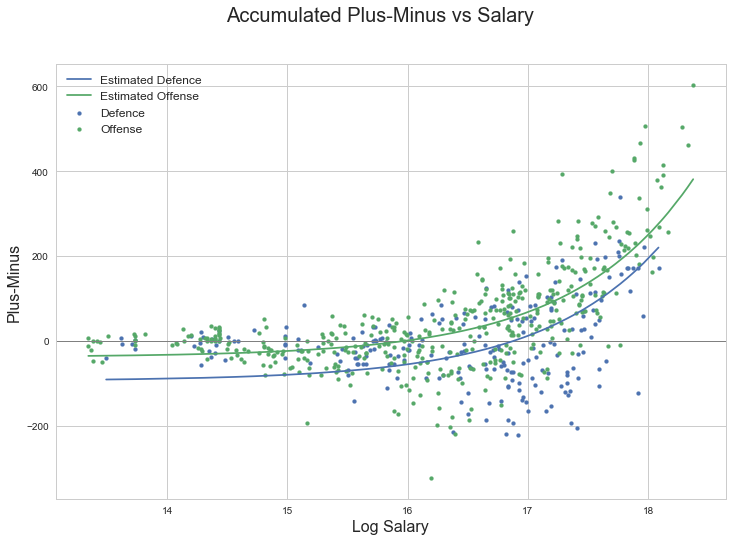

In [387]:
#Scatterplot of plus-minus vs slary on a log scale, grouped by position 
#Predicted valus are overlayed for each position 
##Find predicted valuse for the model 
new['Y_HAT'] = mod.predict(X)

data_defence = new[new["Position"]=='Defence'].sort_index(by=['Salary','Position'], ascending=[1,0])
data_offence = new[new['Position']=='Offense'].sort_index(by=['Salary','Position'], ascending=[1,0])

fig=plt.figure(figsize=(12,8))
fig = plt.axhline(color = 'grey', linewidth = 1)
fig = plt.plot('Log_Salary','Y_HAT',data=data_defence, label='Estimated Defence')
fig = plt.plot('Log_Salary','Y_HAT',data = data_offence, label = 'Estimated Offense')
fig = plt.scatter(y='PM',x='Log_Salary',data=data_defence, label = 'Defence', s = 15)
fig = plt.scatter(y='PM',x='Log_Salary',data=data_offense, label = 'Offense', s = 15)
plt.legend(fontsize=12);

fig.figure.suptitle("Accumulated Plus-Minus vs Salary", fontsize = 20)
plt.xlabel("Log Salary", fontsize = 16)
plt.ylabel("Plus-Minus", fontsize = 16)

plt.show()

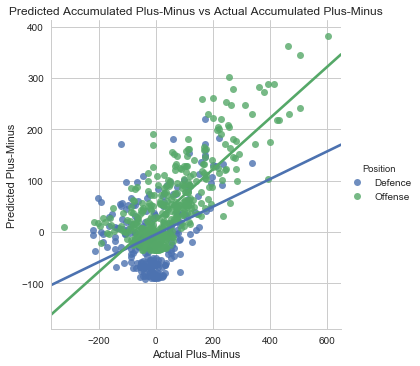

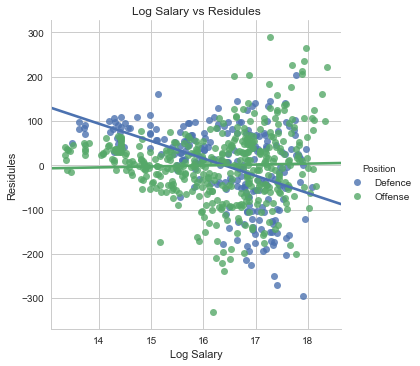

In [388]:
#Get predicuted values 
X = new[['Position','Salary']]

new['Y_HAT'] = mod.predict(X)
new['Residules'] = sm.regression.linear_model.RegressionResults.resid(mod)

## Predicted vs actual 
seaborn.lmplot(x='PM', y='Y_HAT', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Predicted Accumulated Plus-Minus vs Actual Accumulated Plus-Minus")
plt.xlabel('Actual Plus-Minus')
plt.ylabel('Predicted Plus-Minus')
##Residuels vs Log Salary
seaborn.lmplot(x="Log_Salary", y='Residules', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Log Salary vs Residules")
plt.xlabel('Log Salary')
plt.ylabel('Residules')

plt.show()

The residuals look to have a gamma distribution. 

In order to improve the regression model an interaction term can be investigated. 

In [389]:
#using interaction term to try and find the best fitting model 
mod1 = smf.ols('PM ~ Salary : Position', data=new).fit()
print(mod1.summary())


                            OLS Regression Results                            
Dep. Variable:                     PM   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     341.4
Date:                Thu, 18 Jan 2018   Prob (F-statistic):          1.10e-102
Time:                        12:29:27   Log-Likelihood:                -3874.0
No. Observations:                 667   AIC:                             7754.
Df Residuals:                     664   BIC:                             7768.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  
/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  import sys


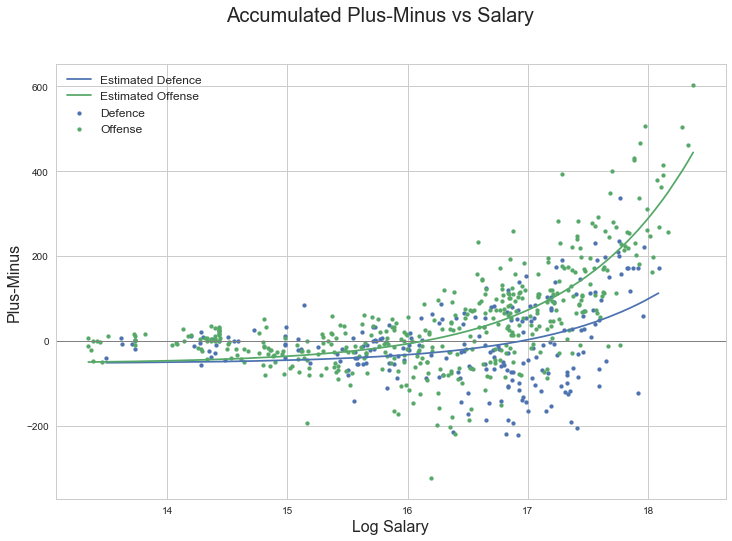

In [390]:
#Scatterplot of plus-minus vs slary on a log scale, grouped by position 
#Predicted valus are overlayed for each position 
##Find predicted valuse for the model 
new['Y_HAT'] = mod1.predict(X)

data_defence = new[new["Position"]=='Defence'].sort_index(by=['Salary','Position'], ascending=[1,0])
data_offence = new[new['Position']=='Offense'].sort_index(by=['Salary','Position'], ascending=[1,0])

fig=plt.figure(figsize=(12,8))
fig = plt.axhline(color = 'grey', linewidth = 1)
fig = plt.plot('Log_Salary','Y_HAT',data=data_defence, label='Estimated Defence')
fig = plt.plot('Log_Salary','Y_HAT',data = data_offence, label = 'Estimated Offense')
fig = plt.scatter(y='PM',x='Log_Salary',data=data_defence, label = 'Defence', s = 15)
fig = plt.scatter(y='PM',x='Log_Salary',data=data_offense, label = 'Offense', s = 15)
plt.legend(fontsize=12);

fig.figure.suptitle("Accumulated Plus-Minus vs Salary", fontsize = 20)
plt.xlabel("Log Salary", fontsize = 16)
plt.ylabel("Plus-Minus", fontsize = 16)

plt.show()

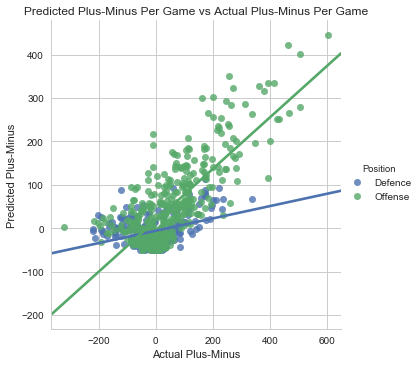

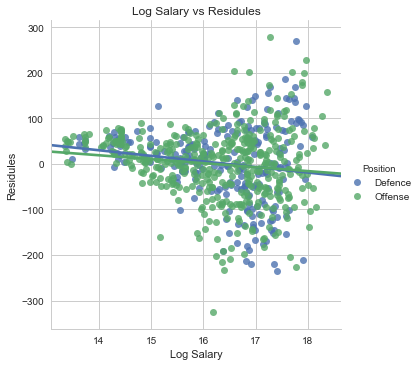

In [391]:
#get predicuted values 
X = new[['Position','Salary']]

new['Y_HAT'] = mod1.predict(X)
new['Residules'] = sm.regression.linear_model.RegressionResults.resid(mod1)

## predicted vs actual 
seaborn.lmplot(x="PM", y='Y_HAT', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Predicted Plus-Minus Per Game vs Actual Plus-Minus Per Game")
plt.xlabel('Actual Plus-Minus')
plt.ylabel('Predicted Plus-Minus')

##Residuels vs Log Salary
seaborn.lmplot(x="Log_Salary", y='Residules', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Log Salary vs Residules")
plt.xlabel('Log Salary')
plt.ylabel('Residules')

plt.show()



Now look at players plus-minus per game 

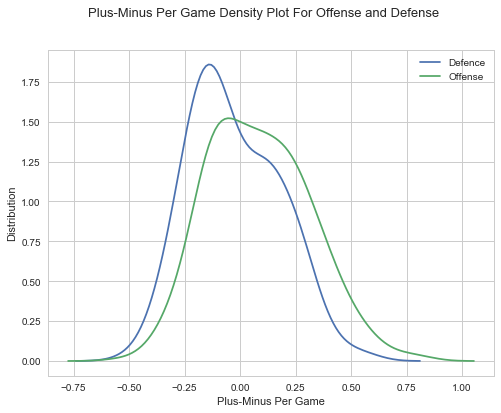

In [392]:
#Overlayed Kernal Density Plot of Offense and Defence 
plt.subplots(figsize=(8, 6))
##Defence 
fig = seaborn.kdeplot(numpy.array(data_defence['Average_PM']), bw=.08, label = "Defence")
##Offense 
fig  = seaborn.kdeplot(numpy.array(data_offense['Average_PM']), bw=.08, label = "Offense")
plt.legend(); # Create a legend 
fig.figure.suptitle("Plus-Minus Per Game Density Plot For Offense and Defense", fontsize = 13)
plt.xlabel("Plus-Minus Per Game")
plt.ylabel("Distribution")
plt.show()

In [393]:
#Fit simple linear regression model 
mod_per_game = smf.ols('Average_PM ~ Salary + Position', data=new).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     PM   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     291.8
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           1.16e-91
Time:                        12:29:29   Log-Likelihood:                -3899.5
No. Observations:                 667   AIC:                             7805.
Df Residuals:                     664   BIC:                             7819.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -93.7971    

/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  
/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  import sys


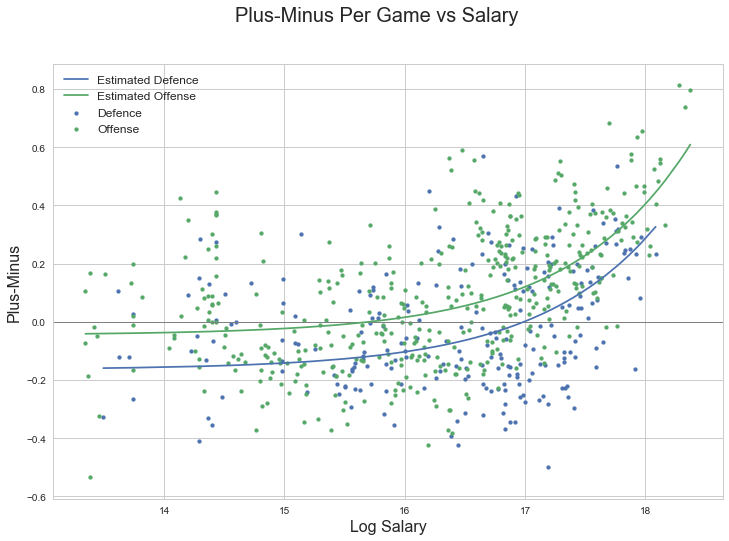

In [394]:
#Scatterplot of Average Plus-Minus per game vs slary on a log scale, grouped by position 
#Predicted valus are overlayed for each position 
##Find predicted vlues for the model 
new['Y_HAT'] = mod_per_game.predict(X)

data_defence = new[new["Position"]=='Defence'].sort_index(by=['Salary','Position'], ascending=[1,0])
data_offence = new[new['Position']=='Offense'].sort_index(by=['Salary','Position'], ascending=[1,0])

fig=plt.figure(figsize=(12,8))
fig = plt.axhline(color = 'grey', linewidth = 1)
fig = plt.plot('Log_Salary','Y_HAT',data=data_defence, label='Estimated Defence')
fig = plt.plot('Log_Salary','Y_HAT',data = data_offence, label = 'Estimated Offense')
fig = plt.scatter(y='Average_PM',x='Log_Salary',data=data_defence, label = 'Defence', s = 15)
fig = plt.scatter(y='Average_PM',x='Log_Salary',data=data_offense, label = 'Offense', s = 15)
plt.legend(fontsize=12);

fig.figure.suptitle("Plus-Minus Per Game vs Salary", fontsize = 20)
plt.xlabel("Log Salary", fontsize = 16)
plt.ylabel("Plus-Minus", fontsize = 16)

plt.show()

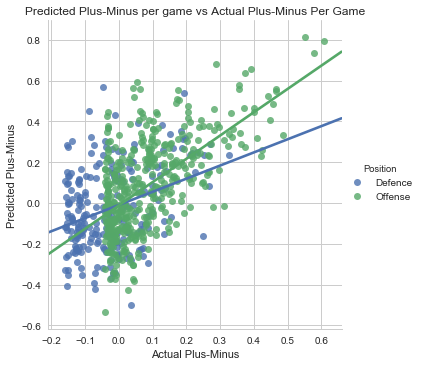

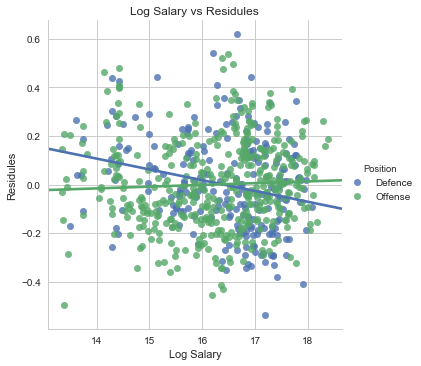

In [395]:
#Get predicuted values 
X = new[['Position','Salary']]

new['Residules'] = sm.regression.linear_model.RegressionResults.resid(mod_per_game)

## Predicted vs actual 
seaborn.lmplot(x='Y_HAT', y='Average_PM', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Predicted Plus-Minus per game vs Actual Plus-Minus Per Game")
plt.xlabel('Actual Plus-Minus')
plt.ylabel('Predicted Plus-Minus')

##Residuels vs Log Salary
seaborn.lmplot(x="Log_Salary", y='Residules', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Log Salary vs Residules")
plt.xlabel('Log Salary')
plt.ylabel('Residules')

plt.show()

In [396]:
#Fit simple linear regression model 
mod1_per_game = smf.ols('Average_PM ~ Salary : Position', data=new).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     PM   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     291.8
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           1.16e-91
Time:                        12:29:30   Log-Likelihood:                -3899.5
No. Observations:                 667   AIC:                             7805.
Df Residuals:                     664   BIC:                             7819.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -93.7971    

/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  
/Users/maxwellbrown/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  import sys


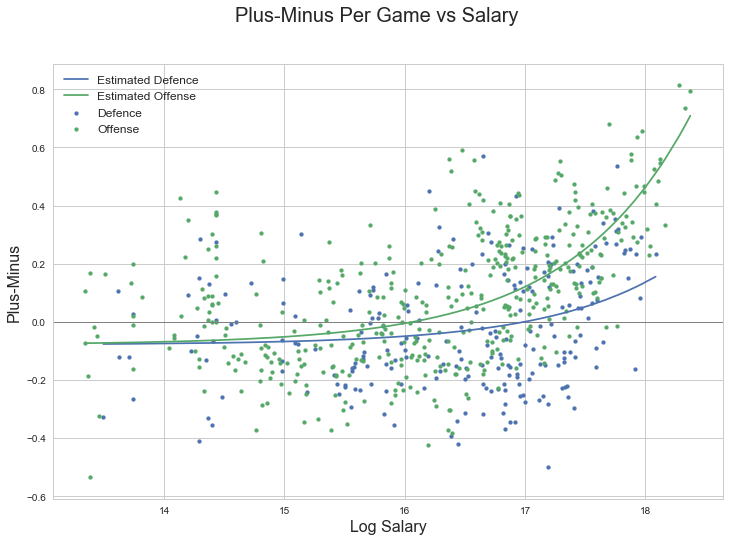

In [397]:
#Scatterplot of Average Plus-Minus per game vs slary on a log scale, grouped by position 
#Predicted valus are overlayed for each position 
##Find predicted vlues for the model 
new['Y_HAT'] = mod1_per_game.predict(X)

data_defence = new[new["Position"]=='Defence'].sort_index(by=['Salary','Position'], ascending=[1,0])
data_offence = new[new['Position']=='Offense'].sort_index(by=['Salary','Position'], ascending=[1,0])

fig=plt.figure(figsize=(12,8))
fig = plt.axhline(color = 'grey', linewidth = 1)
fig = plt.plot('Log_Salary','Y_HAT',data=data_defence, label='Estimated Defence')
fig = plt.plot('Log_Salary','Y_HAT',data = data_offence, label = 'Estimated Offense')
fig = plt.scatter(y='Average_PM',x='Log_Salary',data=data_defence, label = 'Defence', s = 15)
fig = plt.scatter(y='Average_PM',x='Log_Salary',data=data_offense, label = 'Offense', s = 15)
plt.legend(fontsize=12);

fig.figure.suptitle("Plus-Minus Per Game vs Salary", fontsize = 20)
plt.xlabel("Log Salary", fontsize = 16)
plt.ylabel("Plus-Minus", fontsize = 16)

plt.show()

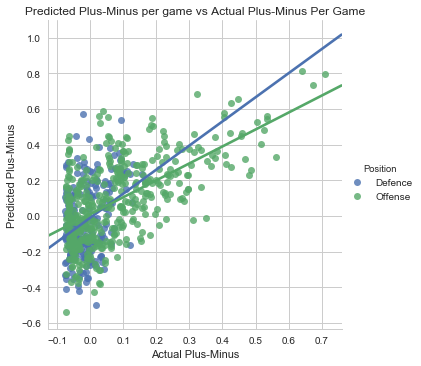

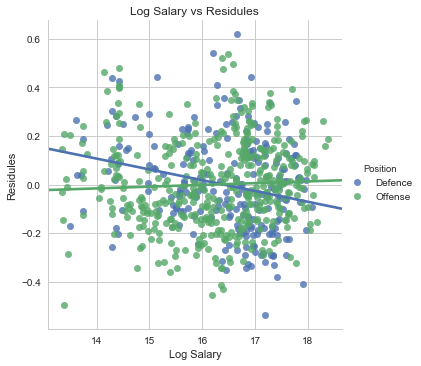

In [398]:
#Get predicuted values 
X = new[['Position','Salary']]

new['Residules'] = sm.regression.linear_model.RegressionResults.resid(mod_per_game)

## Predicted vs actual 
seaborn.lmplot(x='Y_HAT', y='Average_PM', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Predicted Plus-Minus per game vs Actual Plus-Minus Per Game")
plt.xlabel('Actual Plus-Minus')
plt.ylabel('Predicted Plus-Minus')

##Residuels vs Log Salary
seaborn.lmplot(x="Log_Salary", y='Residules', data=new, hue = "Position", 
               size=5, ci=False)
plt.title("Log Salary vs Residules")
plt.xlabel('Log Salary')
plt.ylabel('Residules')

plt.show()